# Decision Tree Classifier


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (confusion_matrix, classification_report,
                             roc_curve, roc_auc_score, accuracy_score, precision_score,
                             recall_score, f1_score)

In [2]:
df = pd.read_csv("diabetes_risk_prediction_dataset.csv")
print(df.head())
df1 = df.copy()

   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [4]:
df1['class'].value_counts()

class
Positive    320
Negative    200
Name: count, dtype: int64

In [5]:
df1['class'] = df1['class'].map({'Positive':1,'Negative':0})
print(df1.head())

   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity  class  
0              No              Yes      Yes

In [6]:
df1['Gender'].value_counts()

Gender
Male      328
Female    192
Name: count, dtype: int64

In [7]:
le = LabelEncoder()
df1['Gender'] = le.fit_transform(df1['Gender'])
print(df1['Gender'].value_counts())

Gender
1    328
0    192
Name: count, dtype: int64


In [8]:
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = df1[col].map({'Yes':1,'No':0})

In [9]:
df1.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [10]:
df1.to_csv("cleaned_diabetes.csv", index=False)

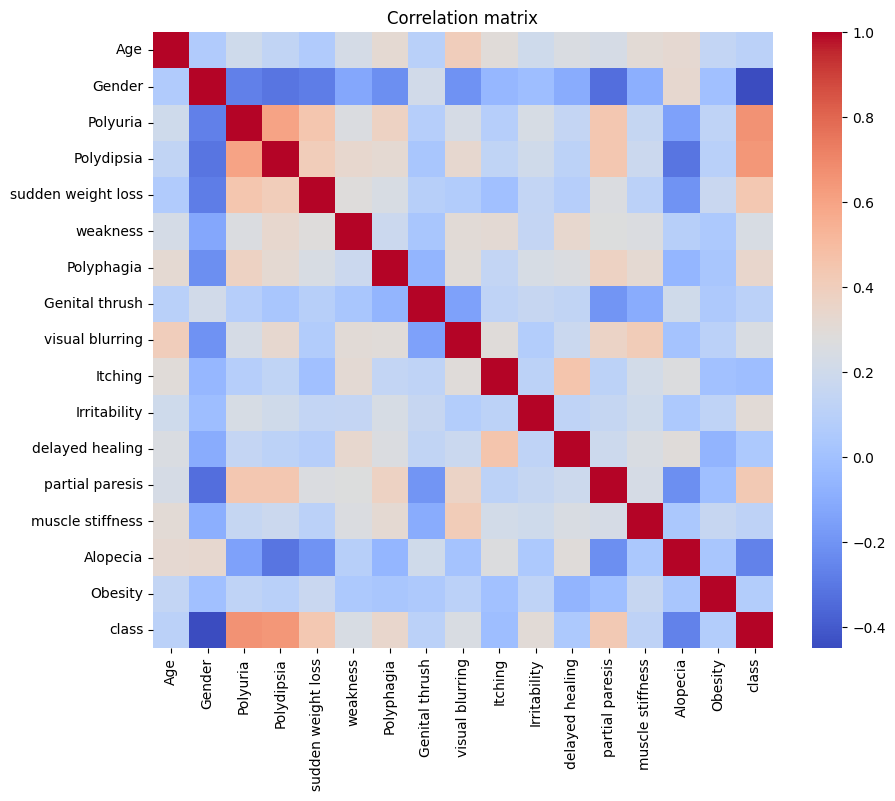

In [11]:
corr = df1.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()

In [12]:
df1.corr()['class'].drop('class').abs().sort_values(ascending=False)

Polyuria              0.665922
Polydipsia            0.648734
Gender                0.449233
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
Alopecia              0.267512
visual blurring       0.251300
weakness              0.243275
muscle stiffness      0.122474
Genital thrush        0.110288
Age                   0.108679
Obesity               0.072173
delayed healing       0.046980
Itching               0.013384
Name: class, dtype: float64

In [13]:
X = df1.drop(columns=['class'])
y = df1['class']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [15]:
param_grid = {
    'max_depth': [None, 3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']}

In [16]:
dt = DecisionTreeClassifier(random_state=42)
gs = GridSearchCV(dt, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc', verbose=1)

In [17]:
print("Best parameters:", gs.best_params_)
print("Best cross-validated AUC:", gs.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best cross-validated AUC: 0.9676388888888887


In [18]:
best = gs.best_estimator_
print(best)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, random_state=42)


In [19]:
y_pred = best.predict(X_test)
y_proba = best.predict_proba(X_test)[:,1]

In [20]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))

Accuracy: 0.9538461538461539
Precision: 0.9868421052631579
Recall: 0.9375
F1: 0.9615384615384616
AUC: 0.9735


In [22]:
print(classification_report(y_test, y_pred, target_names=['Negative(0)','Positive(1)']))

              precision    recall  f1-score   support

 Negative(0)       0.91      0.98      0.94        50
 Positive(1)       0.99      0.94      0.96        80

    accuracy                           0.95       130
   macro avg       0.95      0.96      0.95       130
weighted avg       0.96      0.95      0.95       130



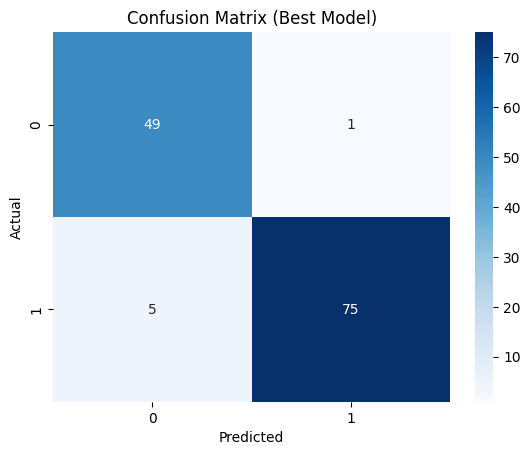

In [23]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Best Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

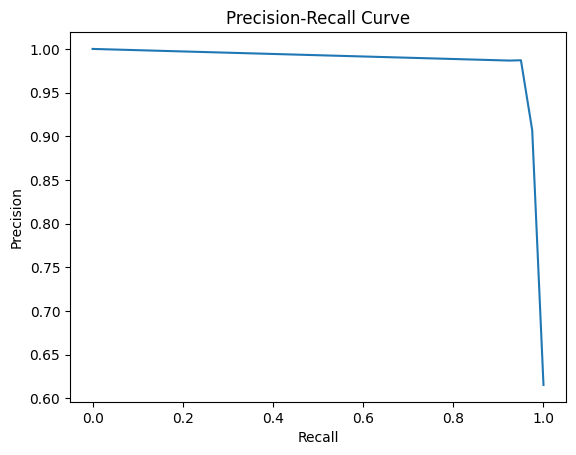

In [25]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

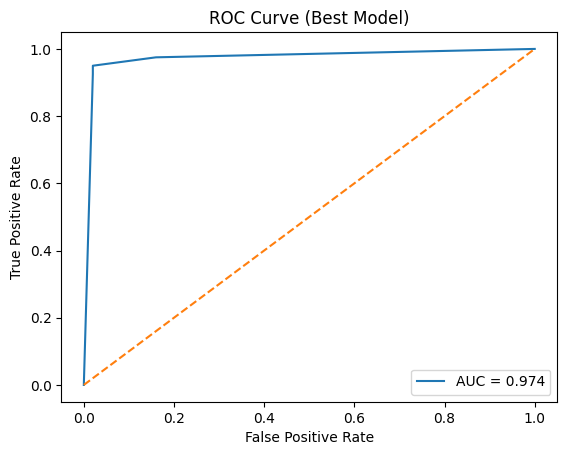

In [26]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Best Model)")
plt.legend()
plt.show()


Top Features:
 Polyuria              0.444650
Polydipsia            0.127369
Gender                0.121245
muscle stiffness      0.067526
Alopecia              0.065484
Age                   0.058264
sudden weight loss    0.032736
Genital thrush        0.026101
delayed healing       0.022889
Irritability          0.017184
dtype: float64


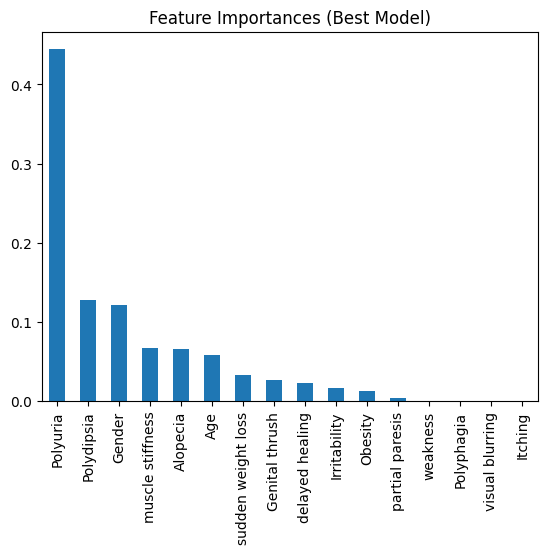

In [27]:
importances = pd.Series(best.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop Features:\n", importances.head(10))
importances.plot(kind='bar')
plt.title("Feature Importances (Best Model)")
plt.show()

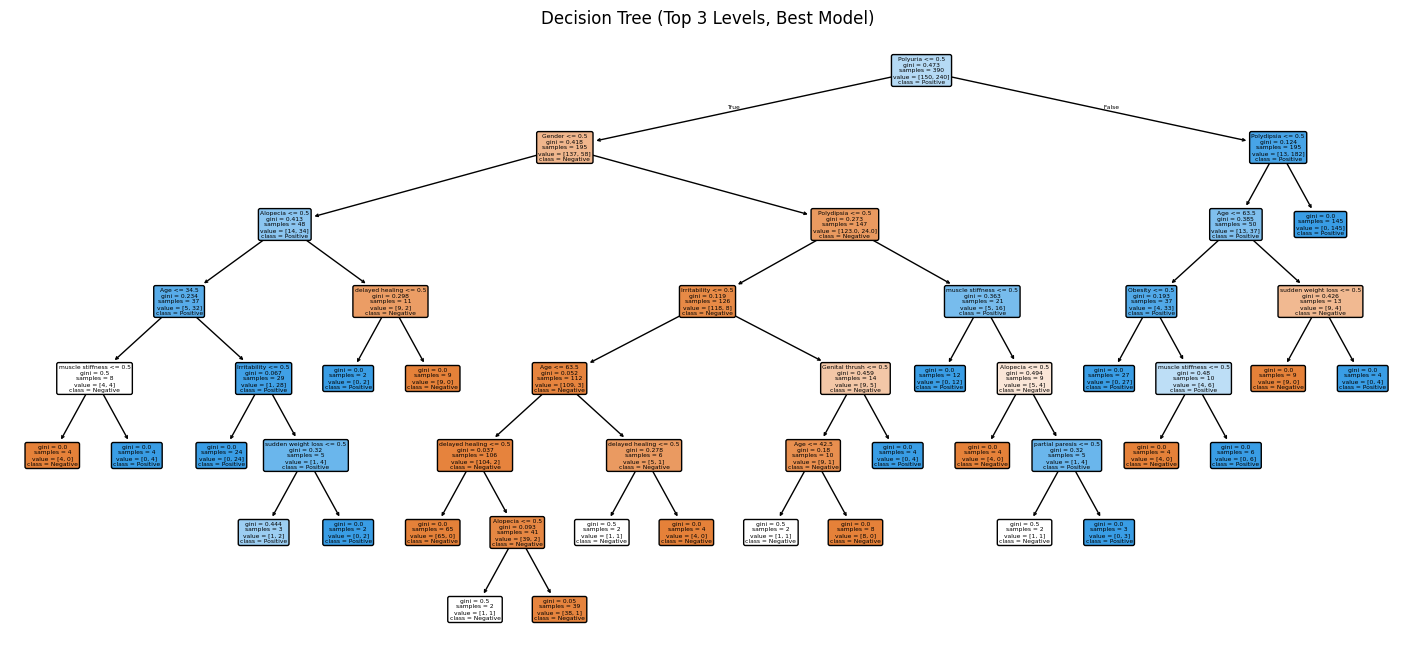

In [28]:
plt.figure(figsize=(18,8))
plot_tree(best, feature_names=X.columns, class_names=['Negative','Positive'], 
          filled=True, rounded=True)
plt.title("Decision Tree (Top 3 Levels, Best Model)")
plt.show()

In [29]:
import joblib
joblib.dump(best, "decision_tree_diabetes_best_model.joblib")
print("Model saved as decision_tree_diabetes_best_model.joblib")

Model saved as decision_tree_diabetes_best_model.joblib


# Using the model in future

model = joblib.load("decision_tree_diabetes_best_model.joblib")

y_pred = model.predict(X_test)

In [31]:
x = [45, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
x = np.array(x).reshape(1, -1)

prediction = best.predict(x)
prediction_proba = best.predict_proba(x)

C:\Users\kumar_santhosh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\kumar_santhosh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [32]:
print(prediction)
print(prediction_proba)

[1]
[[0. 1.]]


In [33]:
x = [45, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]

columns = [
    "Age", "Gender", "Polyuria", "Polydipsia", "sudden weight loss",
    "weakness", "Polyphagia", "Genital thrush", "visual blurring",
    "Itching", "Irritability", "delayed healing", "partial paresis",
    "muscle stiffness", "Alopecia", "Obesity"]
x = pd.DataFrame([x],columns =columns)

prediction = best.predict(x)
prediction_proba = best.predict_proba(x)

In [34]:
print(prediction)
print(prediction_proba)

[1]
[[0. 1.]]


In [35]:
x1 = [45, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0]
x2 = [45, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1]

columns = [
    "Age", "Gender", "Polyuria", "Polydipsia", "sudden weight loss",
    "weakness", "Polyphagia", "Genital thrush", "visual blurring",
    "Itching", "Irritability", "delayed healing", "partial paresis",
    "muscle stiffness", "Alopecia", "Obesity"]

new_data = pd.DataFrame([x1, x2], columns=columns)

new_pred = best.predict(new_data)[0]
new_pred_prob = best.predict_proba(new_data)[0][1]

print(new_pred)
print(new_pred_prob)

1
1.0
